# Experiment 2 B postlab

First, you standardized your NaOH soltion by repeated titrations. Use the code block below to determine the average, standard deviation and 95 % confidence interval for the concentration of NaOH determined by your group.

Recall that if there are outliers, we can remove them from the data set using a Grubb's test!

In [12]:
### Record NaOH concentrations
import numpy as np

NaOH_data = np.genfromtxt ('/content/Experiment 2B - Sheet1 (1).csv', delimiter=",")
#print(NaOH_data)
NaOH = NaOH_data[:,0]
#print(NaOH)
# calculate average, standard deviation and confidence interval
average_OH = np.mean(NaOH)
std_OH = np.std(NaOH, ddof = 1)

#print out your results with a nice class print statement
print(F'The average NaOH concentration is {average_OH} +/- {std_OH}')

print(max(NaOH))
print(min(NaOH))
print(len(NaOH))

The average NaOH concentration is 0.08479418604651164 +/- 0.004202515818251945
0.0942
0.0782
43


### Grubbs Test for Outliers
Now you have the average and the standard deviation of your data. Do you think there might be any outliers? Any values which seem really far away from your mean, and which you think might be the result of a systemattic error or a mistake, rather than just random variation?

We can't just go throwing data points out  because we think they look funky. But we can try a statistic test to see how likely it is that the data point we're suspicious about came from our data set. This test is a called a <b> Grubb's test </b>

First, we must calculate a G value for our data, using our average ($ {\bar  {x}} $ ), our standard deviation (s) and our most likely ourlier ( $ x_{i} $ ). We will plug those values into the following equation: $ G={\frac {\left\vert x_{i}-{\bar  {x}}\right\vert }{s}} $

We then must compare our G value to a 'G critical' value, which we must look up in a table - there is a version of this table in your textbook here [link text](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Analytical_Chemistry_2.1_(Harvey)/16%3A_Appendix/16.07%3A_Critical_Values_for_Grubb's_Test)

Our null hypothesis is that our calculated G value will be less than the 'G critical' value, and that our value is NOT an outlier. Only if our calculated G value is greater than a G critical value, can we discard that value as an outlier.

<b> Before you continue, answer the following questions </b>
1. Look at your data and pick a likely outlier. Explain why you think it is possibly an outlier.


2. Calculate G for your suspected outlier.


3. Look up G critical, and compare it to your calculated G. Is this value an outlier, or not?


In [11]:
# Grubbs test
x_out = max(NaOH) # suspect value

#G experimental
# be sure to update this equation if you used different variable names for average and standard deviation in the block above!
G_exp = (x_out - average_OH)/std_OH

G_crit = 2.549 # Put your G critical value here (we must look it up in the table in our textbook)


#We can then us Python to make a decision:

if G_exp > G_crit:
  print(F'The value {x_out} is an outlier in this data set, and can be removed')

if G_exp <= G_crit:
  print(F'The value {x_out} is NOT an outlier, and must be retained')



The value 0.0942 is NOT an outlier, and must be retained


# Manipulating Titration Data - Finding Endpoints with the pH probe

We will walk through this notebook as a class, and discuss how to get your data formatted to use it in your post-lab calculations!

First, let's just import our data, and take a look a the pH as a function of titrant added. We will plot the data and make sure our data has imported correctly!



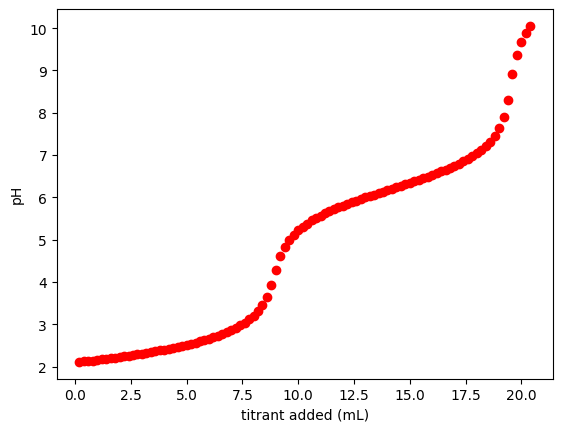

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np


# This is how we'll import our data; it should be saved as a .csv file, in the same folder as this notebook.
# Make sure you have volume in the first column and pH in the second column, with no headings on the data!

csv = np.genfromtxt ('/content/TI_00091.csv', delimiter=",")
volume = csv[:,0]
pH = csv[:,1]

plt.plot(volume, pH, 'ro')

# Add labels on the x and y axis, always including units.
plt.xlabel('titrant added (mL)')
plt.ylabel('pH')


#lets just take a look!
plt.show()




## Finding equivalence points

First, lets take a closer look at the data.

1. Based on the graph above, do you think is acid is a monoprotic, diprotic or triprotic acid?


2. How many equivalence points should we find?


3. Can you see them? Estimate by eye approximately where you think those equivalence points are.




It can be hard to see the equivalence points, remember our pH meters can be slow to respond, and the equivalence point is where the pH is changing the fastest! We can manipulate this data to make it a little easier to find the equivalence point.

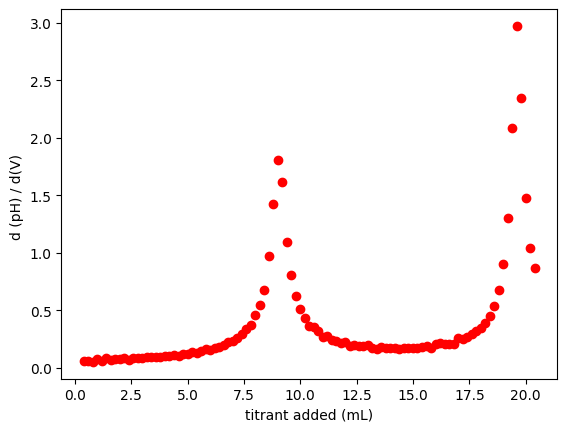

In [14]:
from numpy import diff
# take the derivitive of pH with respect to volume

dpHdV = diff(pH)/diff(volume)

volume_update = np.delete(volume, (0), axis=0)

plt.plot(volume_update, dpHdV, 'ro')

# Add labels on the x and y axis, always including units.
plt.xlabel('titrant added (mL)')
plt.ylabel('d (pH) / d(V) ')


#lets just take a look!
plt.show()

Notice that the sharp peaks are at the equivalence points! Remember, a derivitive is just a measure of how quickly your function is changing, so it is largest where the slope of the line is largest! This makes the equivalnce points a lot easier to see!
We can automatically report the volume of the highest peak, using a very simple numpy command; but notice it may return the 1st or the 2nd equivalence point, depending on which is higher, so be sure to keep them straight!

In [17]:
# finding the index of the highest value in the first derivitive array
ind = np.argmax(dpHdV[1:]) # adjustment to avoid bad first point

# finding the volume at the same index
endpoint_volume = volume_update[ind]

print ("the endpoint volume is " + str(endpoint_volume) + " mL")

the endpoint volume is 20.4 mL


Your textbook also discusses 2nd derivitives as an option for finding an endpoint. This can work very nicely, because the endpoints are where the data crosses zero! Take a look:

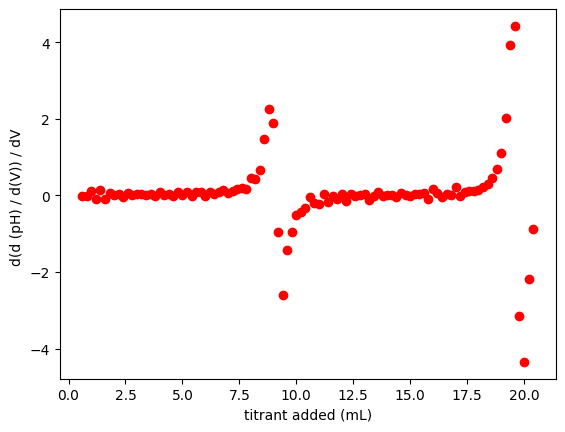

In [18]:
d2pHdV = diff(dpHdV)/diff(volume_update)

volume_update2 = np.delete(volume_update, (0), axis=0)

plt.plot(volume_update2, d2pHdV, 'ro')

# Add labels on the x and y axis, always including units.
plt.xlabel('titrant added (mL)')
plt.ylabel('d(d (pH) / d(V)) / dV ')


#lets just take a look!
plt.show()

This is your second derivitive plot! Now our equivalence point is where the plot crosses zero. Unfortunantly, there is a lot of noise in the data, so optimizing the search for these inflection points is a harder computational problem than I would like to address here, but it can be a good reality check for the data you got from the first derivitive plot!

## Use equivalence point to determine your unknown acid

In the code block below; you your equivalance point to determine two key details about your acid:
1. What is it's molar mass?
2. What is it's pKa


In [ ]:
# Determine molar mass of an unknown acid



#Determine the pKa of your unknown acid


## Postlab questions

1. Consider the standardization of NaOH; how precise was your standardization? Report your determined concentrations with a 95 % confidence interval, and explain whether you think this result was sufficiently precise, or could be improved.

2. What unknown acid do you think you had? Explain your conclusion with observations and numbers.

3. How accurate do you think the titration of the unknown was? Support your conclusion with a percent error calculation, based on your hypothesized identity of the unknown.

4. How does the precision of the standardization process compare to the accuracy of your determination of the unknown? Do you think the error in your molar mass can be attributed to uncertainty in the concentration of NaOH, or are there other possible errors which occured? Be sure to support your claims with data or observations.

